In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_ta as ta
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import pandas_datareader as web
import tensorflow as tf
from tensorflow import keras
import yfinance as yf
import joblib
path="C:/Users/Thato/Downloads/archive (33)/Crop_recommendation.csv"

In [4]:

df=pd.read_csv(path)

In [5]:
df.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [6]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [9]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

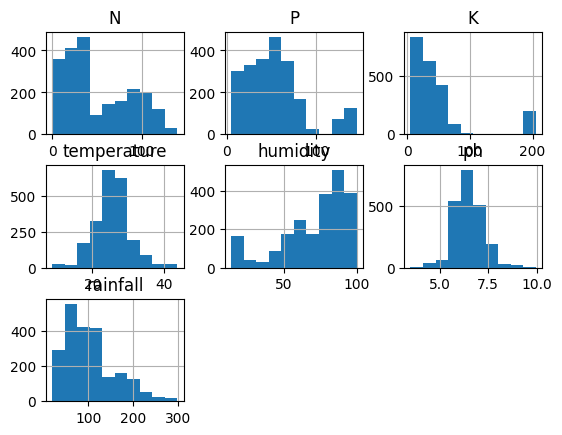

In [11]:
df.hist()
#assessing normality

In [16]:
vals=df.label.unique()

In [21]:
mapping={vals[idx]:idx for idx in range(len(vals))}

In [22]:
mapping

{'rice': 0,
 'maize': 1,
 'chickpea': 2,
 'kidneybeans': 3,
 'pigeonpeas': 4,
 'mothbeans': 5,
 'mungbean': 6,
 'blackgram': 7,
 'lentil': 8,
 'pomegranate': 9,
 'banana': 10,
 'mango': 11,
 'grapes': 12,
 'watermelon': 13,
 'muskmelon': 14,
 'apple': 15,
 'orange': 16,
 'papaya': 17,
 'coconut': 18,
 'cotton': 19,
 'jute': 20,
 'coffee': 21}

In [24]:
from sklearn.model_selection import train_test_split
y=df['label'].map(mapping)
X=df.drop(['label'],axis=1)

In [25]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
clf=Pipeline([('scaler',StandardScaler()),('Gradient Booster',GradientBoostingClassifier())])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        16
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        17
           8       1.00      0.96      0.98        27
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        16
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        22
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        20
          17       1.00    